In [3]:
import pandas as pd
import numpy as np

import kagglehub

# Download latest version
path = kagglehub.dataset_download("dgrosz/sexist-workplace-statements")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sexist-workplace-statements


In [4]:
df=pd.read_excel(path+'/ISEP Sexist Data labeling.xlsx')

In [5]:
print(df)

                                              Sentences  Label
0                             For a woman, that is good      1
1       Just dress sexy and you will sign any contract.      1
2                               Are you having period ?      1
3                                     Stop being bitchy      1
4     I leave early because of her children instead ...      1
...                                                 ...    ...
1132  Opportunities are like night owls. They like t...      0
1133  It's not just a question of doing what you lov...      0
1134  A genius does what he masters. An ordinary man...      0
1135  If you want to know the real reasons behind th...      0
1136  Questioning is important for breakthrough inno...      0

[1137 rows x 2 columns]


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  1137 non-null   object
 1   Label      1137 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.9+ KB
None


In [7]:
print(df.describe())

             Label
count  1137.000000
mean      0.548813
std       0.497831
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


Label
1    624
0    513
Name: count, dtype: int64


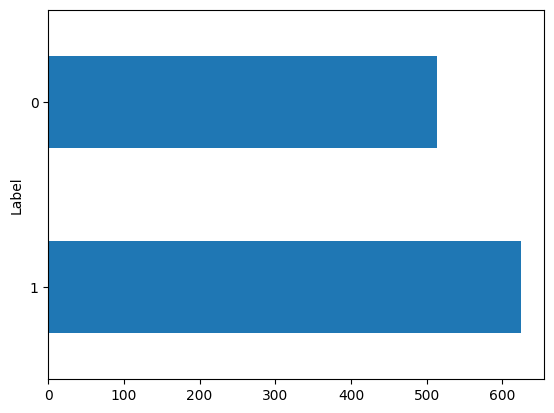

In [8]:
df['Label'].value_counts().plot(kind='barh')
print(df['Label'].value_counts())

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop(columns=['id'], inplace=True, errors='ignore')

In [11]:
print(df)

                                              Sentences  Label
0                             For a woman, that is good      1
1       Just dress sexy and you will sign any contract.      1
2                               Are you having period ?      1
3                                     Stop being bitchy      1
4     I leave early because of her children instead ...      1
...                                                 ...    ...
1132  Opportunities are like night owls. They like t...      0
1133  It's not just a question of doing what you lov...      0
1134  A genius does what he masters. An ordinary man...      0
1135  If you want to know the real reasons behind th...      0
1136  Questioning is important for breakthrough inno...      0

[1137 rows x 2 columns]


In [12]:
majority_class = df['Label'].value_counts().idxmax()
majority_count = df['Label'].value_counts().max()

In [13]:
majority_df = df[df['Label'] == majority_class]
minority_df = df[df['Label'] != majority_class]

In [14]:
from sklearn.utils import resample

In [15]:
upsampled_minority_dfs = []

for label in minority_df['Label'].unique():
    minority_subset = minority_df[minority_df['Label'] == label]
    upsampled = resample(minority_subset,
                         replace=True,
                         n_samples=majority_count,
                         random_state=42)
    upsampled_minority_dfs.append(upsampled)

In [19]:
upsampled_df = pd.concat([majority_df] + upsampled_minority_dfs)

Label
1    624
0    624
Name: count, dtype: int64


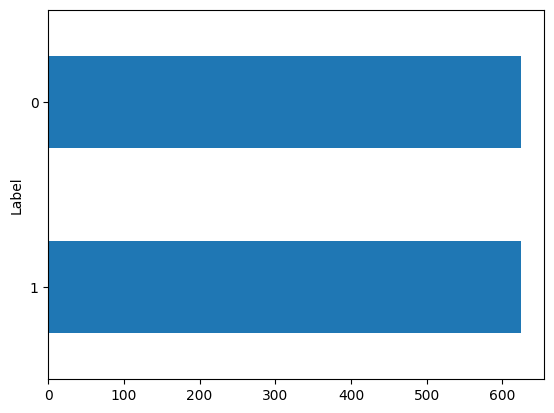

In [20]:
upsampled_df['Label'].value_counts().plot(kind='barh')
print(upsampled_df['Label'].value_counts())

<Axes: ylabel='count'>

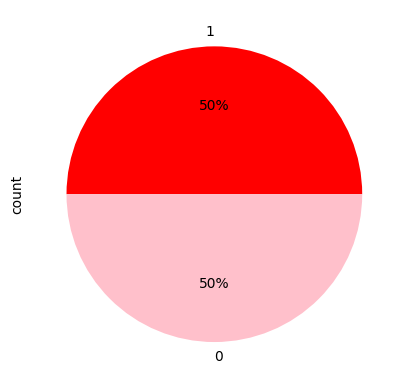

In [21]:
upsampled_df['Label'].value_counts().plot(kind='pie',y='Label',autopct='%1.0f%%',colors=["red", "pink"])

In [22]:
pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.1 MB/s eta 0:00:00


In [23]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [24]:
import pandas as pd
import nlpaug.augmenter.word as naw
import random

def augment_data(df, text_col, num_augmentations):
    augmented_data = []

    aug = naw.SynonymAug(aug_src='wordnet')

    for index, row in df.iterrows():
        original_text = row[text_col]
        augmented_data.append(row.to_dict())

        for _ in range(num_augmentations):
            augmented_text = aug.augment(original_text)
            if augmented_text and len(augmented_text) > 0:
              new_row = row.to_dict()
              new_row[text_col] = augmented_text[0]
              augmented_data.append(new_row)

    return pd.DataFrame(augmented_data)

upsampled_df_augmented = augment_data(upsampled_df, 'Sentences', num_augmentations=1)

print(f"Original DataFrame shape: {upsampled_df.shape}")
print(f"Augmented DataFrame shape: {upsampled_df_augmented.shape}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original DataFrame shape: (1248, 2)
Augmented DataFrame shape: (2496, 2)


In [25]:
print(upsampled_df_augmented)

                                              Sentences  Label
0                             For a woman, that is good      1
1                       For a woman, that be proficient      1
2       Just dress sexy and you will sign any contract.      1
3     Scarcely wearing apparel sexy and you will sig...      1
4                               Are you having period ?      1
...                                                 ...    ...
2491  And honey is work. Only it ' s the good kind o...      0
2492                        Everybody here is competent      0
2493                      Everybody hither be competent      0
2494     The human worker will go the way of the horse.      0
2495  The human proletarian leave go the room of the...      0

[2496 rows x 2 columns]


Label
1    1248
0    1248
Name: count, dtype: int64


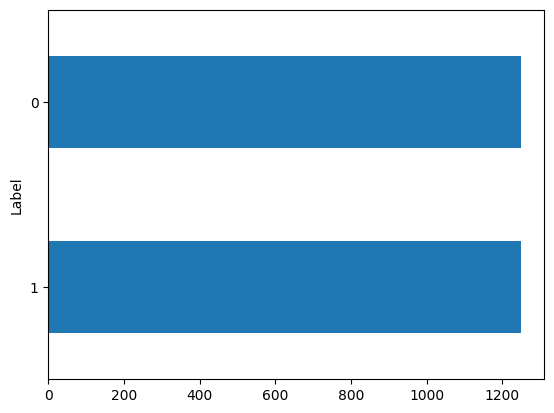

In [26]:
upsampled_df_augmented['Label'].value_counts().plot(kind='barh')
print(upsampled_df_augmented['Label'].value_counts())

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [30]:
upsampled_df_augmented['Sentences'] = upsampled_df_augmented['Sentences'].apply(preprocess)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
def tfidf_vectorize(text_series, max_features=1000):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_series)
    return tfidf_vectorizer, tfidf_matrix

In [33]:
tfidf_vectorizer, tfidf_matrix = tfidf_vectorize(upsampled_df_augmented['Sentences'])

In [34]:
def add_tfidf_to_dataframe(dataframe, text_column, tfidf_matrix, tfidf_vectorizer):
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    dataframe = pd.concat([dataframe.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
    dataframe.drop(text_column, axis=1, inplace=True)
    return dataframe

In [35]:
df_with_tfidf = add_tfidf_to_dataframe(upsampled_df_augmented.copy(), 'Sentences', tfidf_matrix, tfidf_vectorizer)

In [63]:
print(df_with_tfidf)

      Label   53  able  absorbed  absurd  accept  accepted  accomplish  ace  \
0         1  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
1         1  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
2         1  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
3         1  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
4         1  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
...     ...  ...   ...       ...     ...     ...       ...         ...  ...   
2491      0  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
2492      0  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
2493      0  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
2494      0  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   
2495      0  0.0   0.0       0.0     0.0     0.0       0.0         0.0  0.0   

      achieve  ...  writing  wrong  yeah  years  ye

PCA

In [38]:
numeric_df = df_with_tfidf.select_dtypes(include=['float64', 'int64'])

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(scaled_data)

In [43]:
import matplotlib.pyplot as plt

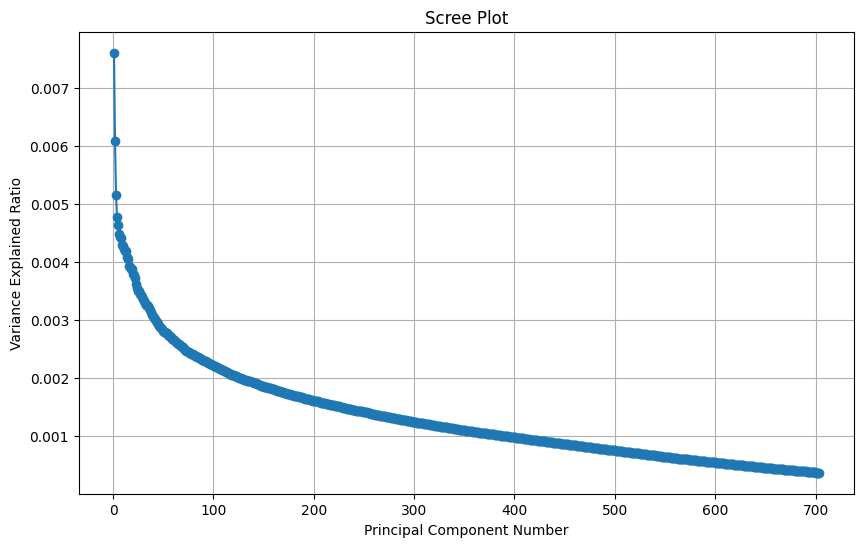

In [44]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance Explained Ratio')
plt.grid(True)
plt.show()

In [45]:
print(pca_result)

[[-0.17095004 -0.2053526  -0.26379221 ... -0.27111213 -0.63950407
   0.20515249]
 [-0.17561411 -0.19801769 -0.23005858 ... -0.39463651 -0.13987267
   0.24305876]
 [-0.18778402  0.30118509 -0.21038672 ...  0.43378959 -0.40487581
  -0.50215152]
 ...
 [-0.08644346 -0.23387856 -0.14917714 ... -0.33105288 -0.75982259
   1.15565441]
 [-0.17202628 -0.38327747 -0.2926224  ...  0.10251688  0.27537448
  -0.16915182]
 [-0.02702856 -0.43822562 -0.27854403 ... -0.71420315 -2.07140846
   0.04231034]]


In [46]:
X = pd.DataFrame(pca_result)

In [47]:
y = df_with_tfidf['Label']

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)


In [61]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [50]:
svm_model = SVC(kernel='rbf', random_state=42,probability=True)

svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [51]:
scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

0.9574160401002507


In [52]:
train_pred = svm_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_pred))

Training Accuracy: 0.9924849699398798


In [53]:
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       250
           1       0.97      0.95      0.96       250

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [54]:
print(accuracy_score(y_test, svm_pred))

0.962


In [55]:
mcc = matthews_corrcoef(y_test, svm_pred)

print(f"Matthews Correlation Coefficient (MCC): {mcc}")

Matthews Correlation Coefficient (MCC): 0.9241848554584865


In [56]:
kappa = cohen_kappa_score(y_test, svm_pred)

print(f"Cohen's Kappa Score: {kappa}")

Cohen's Kappa Score: 0.924


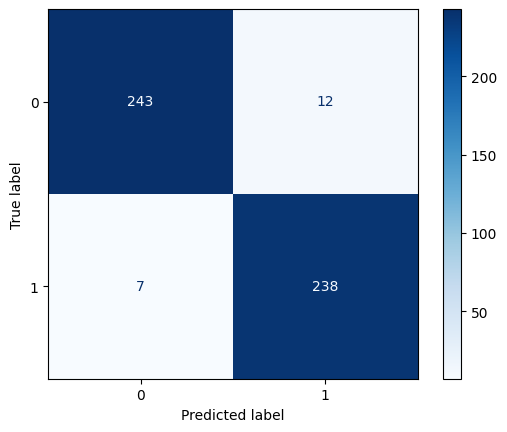

In [57]:
cm = confusion_matrix(svm_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["0","1"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

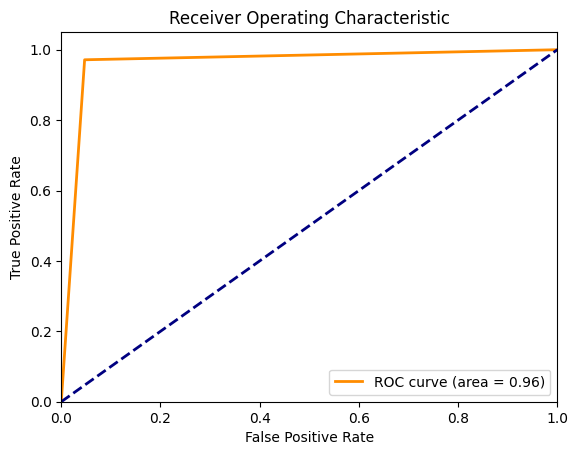

In [62]:
fpr, tpr, thresholds = roc_curve(svm_pred,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()